In [1]:
import pandas as pd

In [2]:
data_car = pd.read_csv("car_data.csv")

In [3]:
data_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data_car.shape

(301, 9)

In [5]:
print(data_car.Seller_Type.unique())
print(data_car.Transmission.unique())
print(data_car.Owner.unique())
print(data_car.Fuel_Type.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [6]:
#Null values

data_car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data_car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data_car_final = data_car.drop('Car_Name', axis =1 )

In [9]:
data_car_final

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
data_car_final['Current_Year'] = 2020

In [11]:
data_car_final['Car_Used_Years'] = data_car_final['Current_Year'] - data_car_final['Year']

In [12]:
data_car_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Car_Used_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [13]:
data_car_final = data_car_final.drop(['Year','Current_Year'], axis = 1 )

In [14]:
data_car_final.shape

(301, 8)

In [15]:
data_car_final.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Used_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [16]:
## getting dummies for categorical features ##one-hot encoding

data_car_final = pd.get_dummies(data_car_final, drop_first = True)

In [17]:
data_car_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Used_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [18]:
import seaborn as sns

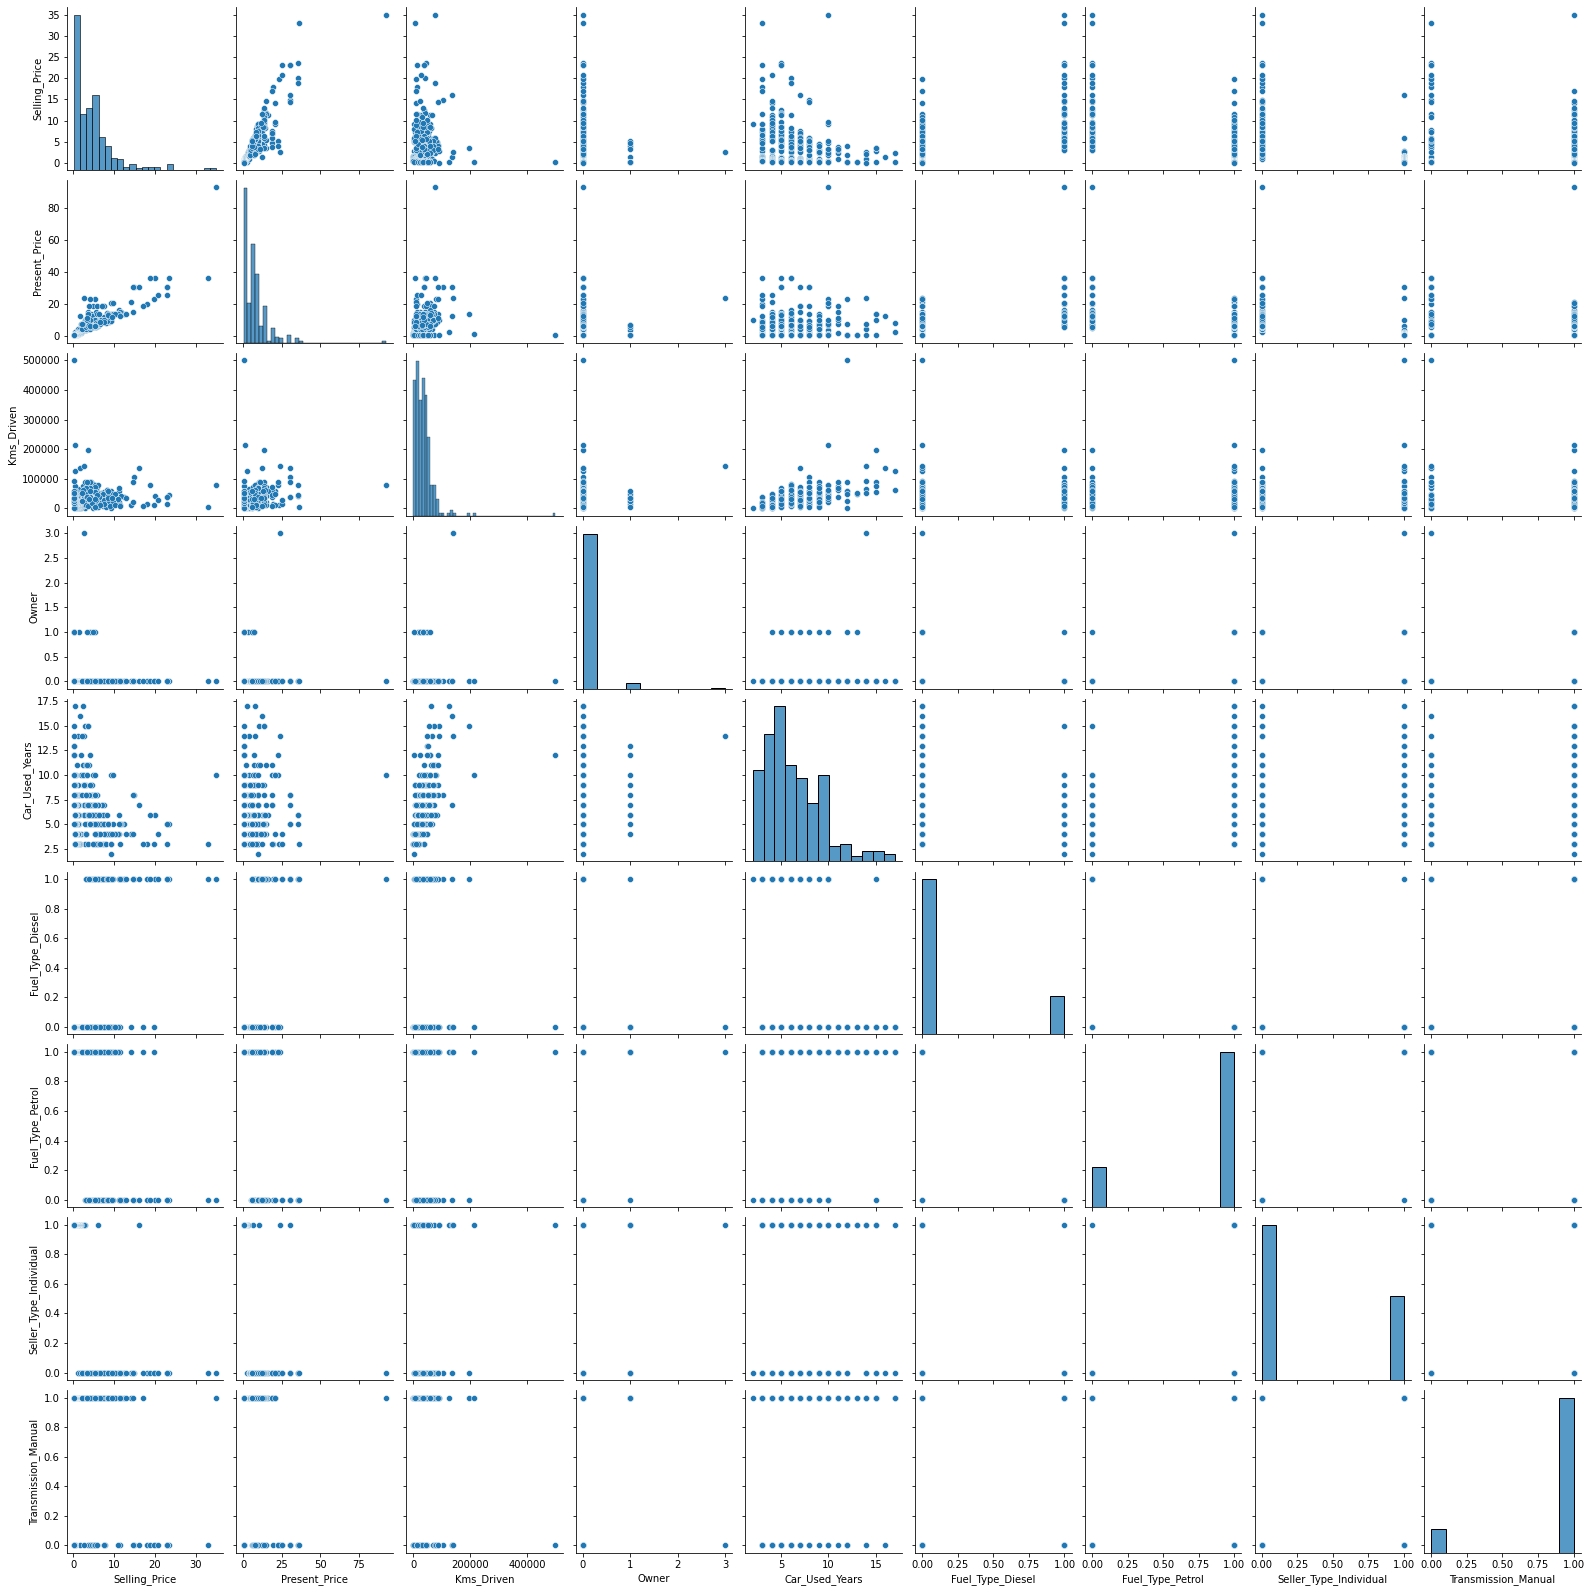

In [19]:
sns.pairplot(data_car_final)

In [20]:
import matplotlib.pyplot as plt

<AxesSubplot:>

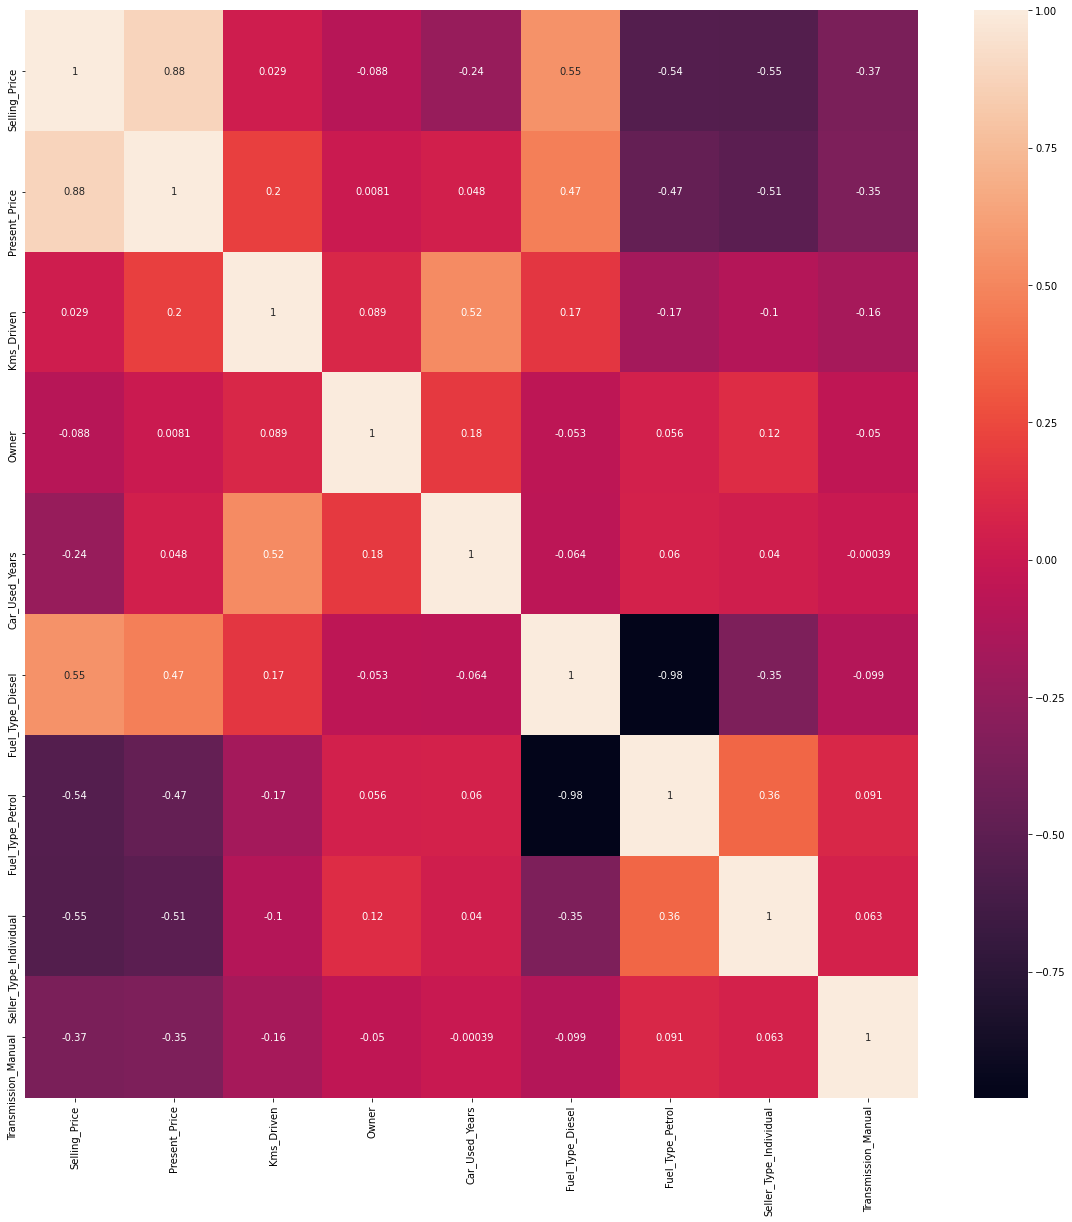

In [21]:
correlation_mat = data_car_final.corr()
corr_features = correlation_mat.index
plt.figure(figsize = (20,20))
## heat map
sns.heatmap(data_car_final[corr_features].corr(), annot = True)

In [22]:
corr_features

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Car_Used_Years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [23]:
X = data_car_final.iloc[:,1:]
Y=data_car_final.iloc[:,0]

In [24]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Used_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [25]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [26]:
 ## feature selection
    
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [27]:
print(model.feature_importances_)

[3.93125196e-01 3.97548851e-02 3.53016698e-04 7.66069328e-02
 2.16559311e-01 2.05486549e-02 1.23595795e-01 1.29456208e-01]


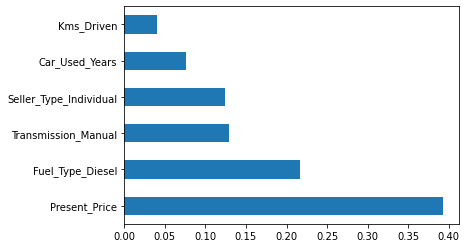

In [28]:
#plotting feature importances

plt_features = pd.Series(model.feature_importances_, index = X.columns)
plt_features.nlargest(6).plot(kind = 'barh')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [30]:
X_train.shape

(210, 8)

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
import numpy as np

In [33]:
## Hyperparameters
n_estimators=[int(x) for x in np.linspace(start = 100, stop =1200, num =12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [34]:
##features to consider at every split
max_feaures = ['auto' , 'sqrt']
##Max number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num =6)]
## Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
## Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
## Creating random grid

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_feaures,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [37]:
rf = RandomForestRegressor()

In [38]:
rf_random = RandomizedSearchCV(estimator= rf , param_distributions= random_grid,
                              scoring = 'neg_mean_squared_error', n_iter = 10,
                              cv =5, verbose =2, random_state = 42,n_jobs  = 1)

In [39]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
predictions = rf_random.predict(X_test)

In [41]:
predictions

array([13.77964562, 10.86119935,  0.53174035,  9.37516468,  4.4483667 ,
        1.17068183,  6.55506295, 10.27354909,  4.70142004,  5.07090494,
        0.26655229,  3.03332567,  0.50015256,  7.26296143,  4.7693608 ,
        4.99620541, 10.03698119,  3.32462093,  7.08146734,  1.30119661,
        0.55280281,  2.8678543 ,  8.13295192,  7.25109632,  0.28912224,
        7.36271311,  3.81913861,  0.41078   ,  1.13320526,  0.31086248,
        7.48392262,  7.62027193,  2.67159374,  4.74456   ,  2.4247645 ,
       22.01362488,  5.30663971,  5.6176555 ,  5.48095511,  7.37981755,
        4.97244241,  2.88339321,  0.58307306,  0.58144952,  1.17527359,
        0.66001562,  1.18139486,  0.41241639,  4.04261963,  1.17173732,
        4.39741393,  5.59606472,  0.25538088,  5.62893304,  3.00217914,
        7.48104766,  3.86472688,  0.6311399 ,  9.83371524,  5.43724631,
        4.77253148,  0.24224957,  0.52915053,  1.1375919 ,  1.17469712,
        3.02839281,  7.56151385,  0.41725315,  0.37926283,  2.87

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

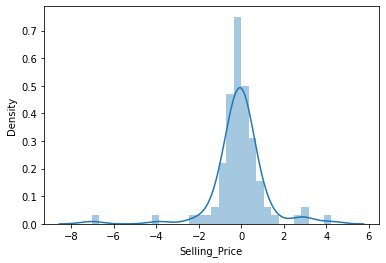

In [42]:
sns.distplot(Y_test - predictions)

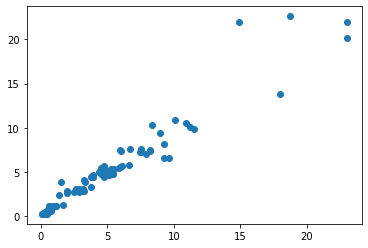

In [43]:
plt.scatter(Y_test, predictions)

In [48]:
import pickle

In [47]:
file = open('random_forest_regression_model.pkl', 'wb')

pickle.dump(rf_random, file)